In [1]:
import sys
sys.path.append("..")

from algorithm import *
from analysis_util.visualize import *
from analysis_util.cylcle_classifier import Cycle_Classifier
from classes.environment import Environment

import h5py
import os

# Used for seed in np.random
Reproduce = 2023

In [2]:
k = 6
Qs = [1 + 0.5*i for i in range(7)]
env = Environment(Lambda=0.5)

In [5]:
np.random.seed(Reproduce)
simulate_episodes("V2gamma095", env, Qs, gamma=0.95, L=100, n_episodes=1_000)

In [6]:
import h5py

def print_hdf5_groups(file):
    def print_groups(name, obj):
        if isinstance(obj, h5py.Group):
            print(name)
    
    with h5py.File(file, 'r') as f:
        f.visititems(print_groups)

# Replace 'your_file.h5' with the path to your HDF5 file
current_dir = os.getcwd()
file_path = os.path.join(current_dir, '..', '..', 'data', 'simulation_data.h5')
print_hdf5_groups(file_path)

Baseline
BaselineFinalTest
BaselineFinalTest1
Gamma075
Gamma08
Gamma085
Gamma095
Gamma098
Gamma1
Gammatest001
Gammatest01
Gammatest0701
TEST007
TEST2234
TEST223664
Testgamma1
Testgamma12
TheBaseline
V2gamma09
V2gamma095


In [11]:
current_dir = os.getcwd()
file_path = os.path.join(current_dir, '..', '..', 'data', 'simulation_data.h5')

file = h5py.File(file_path, 'r')

group = file['V2gamma095']

pi1_L = group['pi1_L'][:]; pi2_L = group['pi2_L'][:]
theta1_L = group['theta1_L'][:]; theta2_L = group['theta2_L'][:]
q1_L = group['q1_L'][:]; q2_L = group['q2_L'][:]
pi1_t = group['pi1_t'][:]; pi2_t = group['pi2_t'][:]
theta1_t = group['theta1_t'][:]; theta2_t = group['theta2_t'][:]
q1_t = group['q1_t'][:]; q2_t = group['q2_t'][:]


file.close()
env = Environment(Lambda=0.5)
Cycles = Cycle_Classifier(env, pi1_L, pi2_L, theta1_L, theta2_L, q1_L, q2_L)

print(Cycles.mean_variance_profit())
print(Cycles.mean_variance_q())
print(Cycles.mean_variance_theta())

(0.46021550925925925, 0.08542700163864499)
(0.5409333333333334, 0.09653655433210989)
(0.21308611111111112, 0.1094847585162323)


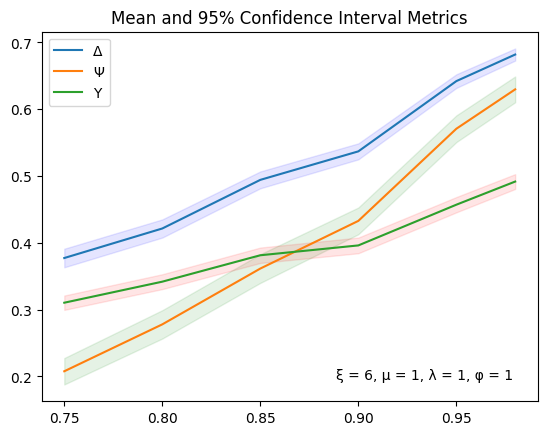

In [2]:
env = Environment()
visualize_over_gamma(env, ['Gamma075', 'Gamma08', 'Gamma085', 'TheBaseline', 'Gamma095', 'Gamma098'])

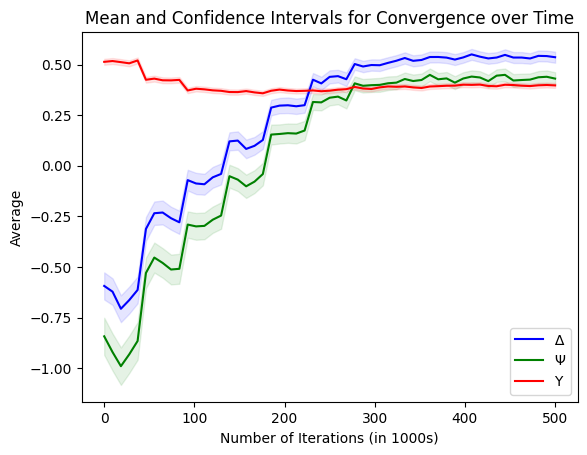

In [3]:
visualize_convergence_over_T(Environment(), "TheBaseline")

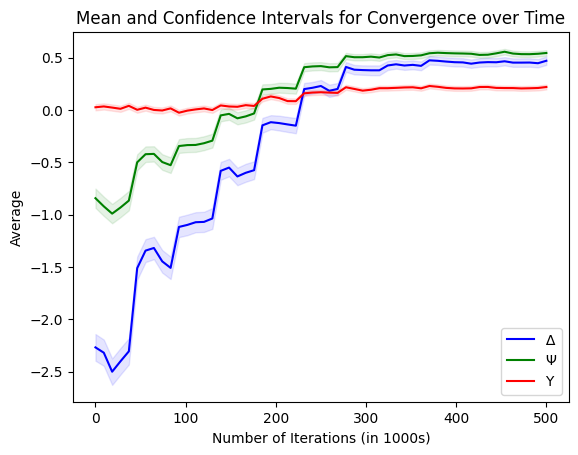

In [4]:
visualize_convergence_over_T(Environment(Lambda=0.5), "V2gamma095")

In [4]:
Cycles.longest_cycles()[0][0]

((2.3333333333333335, 2.6388888888888884, 0.0, 0.16666666666666666, 2.0, 2.5),
 (5.333333333333333, 2.638888888888889, 0.0, 0.6666666666666666, 2.0, 1.5),
 (5.222222222222222,
  3.138888888888889,
  0.3333333333333333,
  0.6666666666666666,
  2.0,
  1.5),
 (2.888888888888889, 3.083333333333333, 0.3333333333333333, 0.5, 2.0, 2.5),
 (3.0, 2.25, 0.0, 0.5, 2.0, 2.5),
 (5.333333333333333, 2.638888888888889, 0.0, 0.6666666666666666, 2.0, 1.5),
 (5.222222222222222,
  3.138888888888889,
  0.3333333333333333,
  0.6666666666666666,
  2.0,
  1.5),
 (3.8888888888888884, 3.4166666666666665, 0.3333333333333333, 0.5, 2.0, 2.0),
 (3.555555555555556, 4.083333333333333, 0.6666666666666666, 0.5, 2.0, 2.0),
 (1.5555555555555556, 4.416666666666666, 0.6666666666666666, 0.0, 2.0, 2.5),
 (2.0555555555555554, 4.833333333333334, 0.3333333333333333, 0.0, 1.5, 2.5),
 (2.3055555555555554,
  4.722222222222221,
  0.3333333333333333,
  0.16666666666666666,
  1.5,
  2.5))

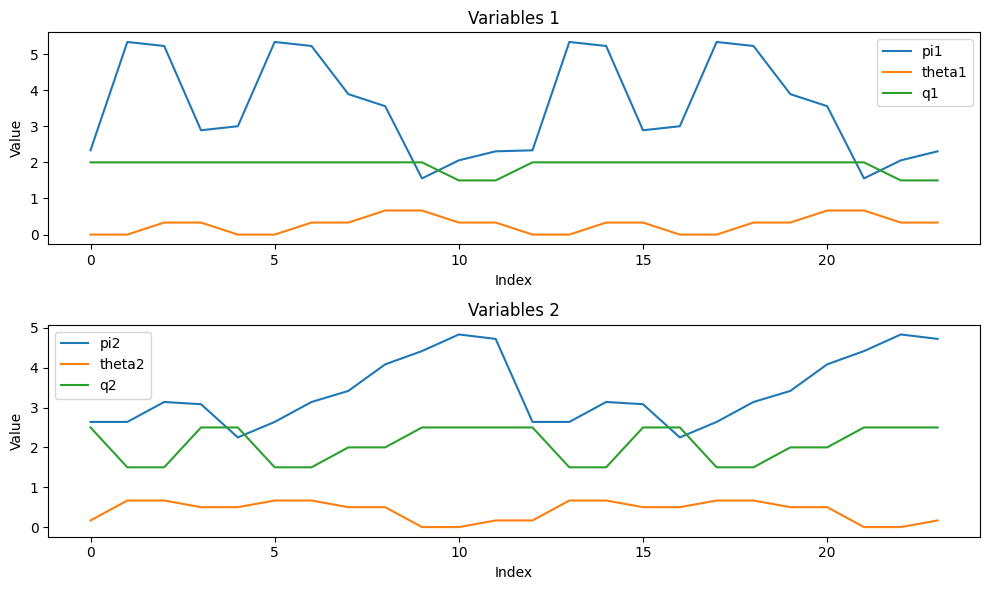

In [3]:
visualize_cycle(Cycles.longest_cycles()[0][0])

In [8]:
Cycles.most_profitable_cycle() # Also here only found once

[4.5, (((4.5, 4.5, 1.0, 1.0, 1.5, 1.5),), 2)]

In [9]:
Cycles.most_found_cycle()

(((4.888888888888888, 3.25, 0.3333333333333333, 0.5, 2.0, 1.5),), 31)

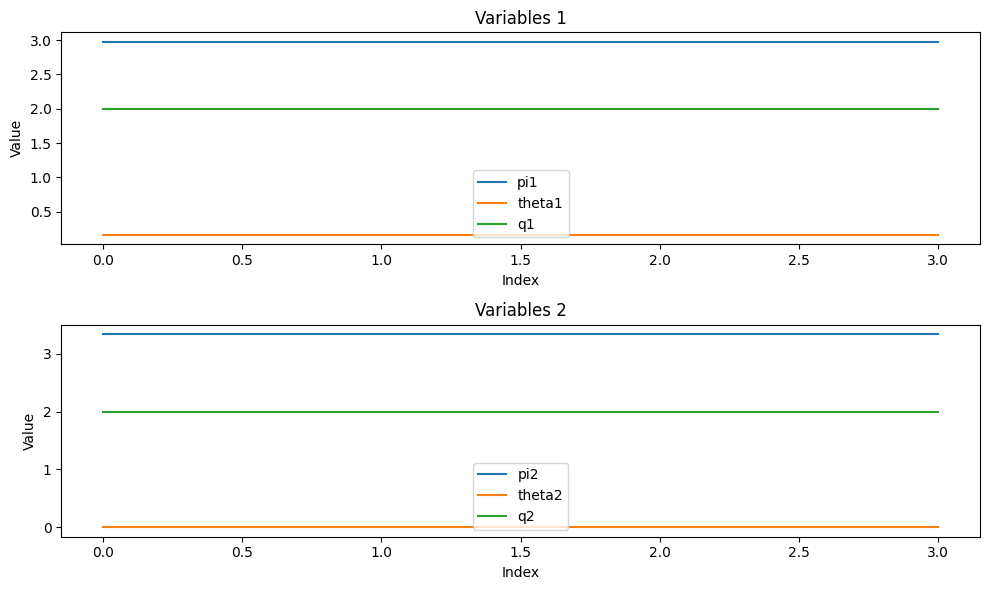

In [9]:
visualize_cycle([Cycles.most_found_cycle()[0][0]])

In [11]:
len(Cycles.subcompetitive_profit_cycles())

27

In [12]:
Cycles.most_found_cycle()

(((2.972222222222222, 3.333333333333333, 0.16666666666666666, 0.0, 2.0, 2.0),),
 27)

In [13]:
len(Cycles.found_cycles)

511